In [1]:
import torch
# pytorch 中所有带_ 的函数或者方法，都是在该对象上进行改变。
# 而不带的，则会返回一个新对象
# tensor 与numpy数组 共享内存，所以Tensor和Numpy的数组之间的互操作非常容易且快速。对于Tensor不支持的操作，可以先转为Numpy数组处理，之后再转回Tensor

#张量的创建方式
## 还有其它方式可以查询文档
torch.Tensor() #仅分配空间，不初始化

torch.tensor() #强制转换，但是是数据拷贝，即创建了新对象。是一个功能更强大的函数，它可以接受各种Python对象作为输入，并尝试将其转换为张量。它可以接受一个已经是张量的对象，并创建一个与该张量具有相同数据类型和设备的新张量。

torch.rand() #[0,1]随机分配

torch.ones() #全一

torch.zeros() #全零

torch.arange(s,e,step) # 从s到e，步长为step

torch.from_numpy() #numpy转换

torch.from_list() #list转换

#张量的查看
.size() #查看形状

# 张量的形状调整
**tensor.view()方法: 调整tensor的形状，但必须保证调整前后元素总数一致。不修改自身,数据，返回的新tensor与源tensor共享内存，相当于只是对内存读取步数做了改变。常与squeeze和unsqueeze两个函数一起使用。**

注意：.view()必须保证张量是连续的，否则需要使用tensor.contiguous()将其连续。
* *在使用过程中，常令某一维为-1，自动计算它的大小*

**tensor.reshape():传入shape参数即可，与.view()方法一致，但可以在不连续的情况下使用**
* 当 tensor 满足连续性要求时，reshape() = view()，和原来 tensor 共用存储区
* 当 tensor 不满足连续性要求时 (不连续是不能使用 view() 方法的)，reshape() = **contiguous() + view()，会产生新的存储区的 tensor，与原来 tensor 不共用存储区

**tensor.unsqueeze(): 在指定位置上插入一个大小为1新的维度**

**tensor.squeeze(): 是一个在PyTorch中用于减少维度的方法。它可以从张量中移除大小为1的维度。**
* *squeeze()方法会检查张量中的每个维度，并且如果该维度的大小为1，则会将该维度移除。这样可以将原来大小为1的维度去除，从而减少张量的维度。*

**tensor.resize()：用于更改张量的形状，传递一个新的大小（shape）作为参数，用于指定张量应该具有的新形状。但是更改前后元素数量应该保证不变。**

**tensor.resize_():更改张量的形状，并且可以对元素的数量不做要求**

* *如果新大小超过了原大小，会自动分配新的内存空间，共享内存，但由于新开辟了内存空间，所以源地址改变了*
* *而如果新大小小于原大小，则之前的数据依旧会被保存，共享内存*




In [ ]:
a = torch.arange(0,6)
print(a.shape)
a = a.view(2,3)
print(a.shape)
a=a.unsqueeze(1)
print(a.shape)
a=a.squeeze(1)
print(a.shape)
print(a)
b = a.view(1, 1, 1, 2, 3)
a[1][1] = 100
print(b)
print(a)
print(a.shape,b.shape) # a修改，b作为view之后的，也会跟着修改



torch.Size([6])
torch.Size([2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 3])
tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[[[[  0,   1,   2],
           [  3, 100,   5]]]]])
tensor([[  0,   1,   2],
        [  3, 100,   5]])
torch.Size([2, 3]) torch.Size([1, 1, 1, 2, 3])


In [ ]:
# m的形状大于原来形状，开辟新空间，可以看到，a的地址变了，但a与m的地址共享。
print(a.data_ptr())
m = a.resize_(3,3)
print(a.data_ptr(),a)
print(m.data_ptr(),m)

97615468723200
97615468133824 tensor([[                  0,                   1,                   2],
        [                  3,                 100,                   5],
        [4121969262013342509, 3256213801953747254, 7017841198877848889]])
97615468133824 tensor([[                  0,                   1,                   2],
        [                  3,                 100,                   5],
        [4121969262013342509, 3256213801953747254, 7017841198877848889]])


In [ ]:
# n的形状小于原来形状，a与n的地址共享，相当于只是截取了一段显示出来，原数据仍然存在。
print(a.data_ptr())
n= a.resize_(1,3)
print(a.data_ptr(),a)
print(n.data_ptr(),n)
mn= a.resize_(3,3)
print(mn.data_ptr(),mn)

97615468133824
97615468133824 tensor([[0, 1, 2]])
97615468133824 tensor([[0, 1, 2]])
97615468133824 tensor([[                  0,                   1,                   2],
        [                  3,                 100,                   5],
        [4121969262013342509, 3256213801953747254, 7017841198877848889]])


# 索引操作
与numpy中的arrary数据类型索引操作类似，这里仅介绍几个高级索引方式，其余不做过多叙述。

#归并操作：即会使输出维度小于输入的一些操作
* mean/sum/median/mode	均值/和/中位数/众数
* norm/dist	范数/距离
* std/var	标准差/方差
* cumsum/cumprod	累加/累乘

*以上大多数函数都有一个参数dim，用来指定这些操作是在哪个维度上执行的。*
*同时含有参数keepdim，若keepdim=True则会保留维度1*

**有例外，如cumsum。**

# 张量类型
t.set_default_tensor_type 来修改默认tensor类型(如果默认类型为GPU tensor，则所有操作都将在GPU上进行)。


HalfTensor是专门为GPU版本设计的，同样的元素个数，显存占用只有FloatTensor的一半，所以可以极大缓解GPU显存不足的问题，但由于HalfTensor所能表示的数值大小和精度有限^2，所以可能出现溢出等问题

In [7]:
a = torch.ones(2,3)
print(a.sum(dim=0,keepdim=True).size())
print(a.sum(dim=0,keepdim=False).size())
print(a.sum(dim=0,keepdim=True).data_ptr())
print(a.data_ptr())

## 对cumsum,其形状并未发生改变
b =a.cumsum(dim=1)
print(b)

torch.Size([1, 3])
torch.Size([3])
96386007204416
96386006990336
tensor([[1., 2., 3.],
        [1., 2., 3.]])


#张量运算，仅作示例，要用就查
## 元素操作
* abs/sqrt/div/exp/fmod/log/pow..	绝对值/平方根/除法/指数/求余/求幂..
* cos/sin/asin/atan2/cosh..	相关三角函数
* ceil/round/floor/trunc	上取整/四舍五入/下取整/只保留整数部分
* clamp(input, min, max)	超过min和max部分截断
* sigmod/tanh..	激活函数
* 相关比较函数

对于很多操作，例如div、mul、pow、fmod等，PyTorch都实现了运算符重载，所以可以直接使用运算符。如a ** 2 等价于torch.pow(a,2), a * 2等价于torch.mul(a,2)。

**例如元素加法**

x,y为张量

* x+y
* y.add(x)
* torch.add(x, y, out=result)#需要先给result分配空间,然后指定result为输出

## 矩阵乘法
* torch.matmul()函数： z=torch.matmul(x,y)
* 使用张量对象的.matmul()方法： z=x.matmul(y)

# 获取某个元素值
直接tensor[idx]得到的是一个0维张量，被称作scalar，获取值使用scalar.item()

  * 主要是item()方法，scalar只是一个名称
  * 特别的， 只有一个元素的tensor也可以调用`tensor.item()`

In [ ]:
b = torch.ones(5)
print(b.size())
b.add_(b)
b

torch.Size([5])


tensor([2., 2., 2., 2., 2.])

In [ ]:
scala = b[0]
scala

tensor(2.)

In [ ]:
scala.item()

2.0

In [ ]:
tensor = torch.tensor([1])
tensor.item()

1

# 转换到gpu的方法
* 提前设置device属性
* 使用.to() 方法
* .cuda() 方法，但不太推荐这种


    device = torch.device("cuda:0" if t.cuda.is_available() else "cpu"

# 自动微分
## 会保存计算图，只需对最后结果使用.backward()方法，就可以看到各个计算位置图
* tensor.requries_grad=True
* 创建时设置.requries_grad 属性
## 需要注意的是，grad在反向传播的时候是累加的，所以在一次更新后，都要注意把之前梯度清零。
使用： tensor.grad.data.zero_()

当然，在训练过程中，一般会对优化器进行清零：    

    optimizer.zero_grad()


In [ ]:
x = torch.ones(5,requires_grad=True)
# 等价于：
# x = torch.ones(5)
# x.requries_grad = True

In [ ]:
y = x.sum()
y

tensor(5., grad_fn=<SumBackward0>)

In [ ]:
y.backward()
x.grad

tensor([1., 1., 1., 1., 1.])

# 神经网络
pytorch 中已经定义好了基础的神经网络的基础模型，
因此我们定义网络的时候，都是从nn.Moudle继承而来。
## 重写__init__()
一般具有可学习参数的模块将定义在此。
当然，不具备可学习参数的也可以在此，但会增加模型的开支
## 重写forward()
forward方法被调用后会返回前向传播的结果

# 这里插入一个我遇到过的疑惑
为什么pytorch中可以在torch.nn中使用卷积层与池化，也可以在torch,nn.functional中进行卷积与池化？

我们会发现：在torch.nn模块，与torch.nn.functional中，存在许多功能一样的api接口，这是为什么呢？

在PyTorch中，torch.nn 和 torch.nn.functional 都可以用于实现卷积层和池化层，但它们之间的使用方式和场景略有不同。

## torch.nn：这个模块提供了许多神经网络层的类，例如 nn.Conv2d 和 nn.MaxPool2d。当你使用这些类时，会创建一个具有可学习参数（例如权重和偏差）的对象。这是面向对象编程（OOP）的方法，通常在定义网络架构时使用。


    import torch
    import torch.nn as nn

    conv_layer = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
    pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

## torch.nn.functional：这个模块提供了许多神经网络层的函数，例如 F.conv2d 和 F.max_pool2d。当你使用这些函数时，需要手动提供输入数据和权重等参数。这是函数式编程（FP）的方法，通常在定义前向传播时使用。

    <PYTHON>
    import torch
    import torch.nn.functional as F

    input_data = torch.randn(1, 3, 32, 32)
    weight = torch.randn(64, 3, 3, 3)

    conv_output = F.conv2d(input_data, weight, padding=1)
    pool_output = F.max_pool2d(conv_output, kernel_size=2, stride=2)

总结：

使用 torch.nn 时，你会创建一个具有可学习参数的对象，这些参数会在训练过程中自动更新。
使用 torch.nn.functional 时，你需要手动提供输入数据和权重等参数，但这可以让你有更多的控制和灵活性。
在实际应用中，通常会将 torch.nn 用于定义网络结构（创建层对象），而将 torch.nn.functional 用于定义前向传播过程（计算层之间的关系）。

In [ ]:
# 定义一个基础网络

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        # 也可以写作 super().__init__()
        super(Net, self).__init__()

        # 卷积层 '1'表示输入图片为单通道, '6'表示输出通道数，'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 仿射层/全连接层，y = Wx + b
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        # 卷积 -> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape，‘-1’表示自适应
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


网络的可学习参数通过net.parameters()返回，net.named_parameters可同时返回可学习的参数及名称。

In [ ]:
net.parameters()

<generator object Module.parameters at 0x7e9ff1af2e30>

In [ ]:
#print(list(net.parameters()))
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


# 损失函数
nn实现了神经网络中大多数的损失函数

In [ ]:
criterion = nn.MSELoss()

# 优化器
在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和参数，例如随机梯度下降法(SGD)的更新策略如下：

weight = weight - learning_rate * gradient
手动实现如下：

    learning_rate = 0.01
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)# inplace 减法
torch.optim中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用，因此大多数时候并不需要手动写上述代码。

In [ ]:
import torch.optim as optim
# 新建一个优化器，指定要调整的参数和学习率,以及动量
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.5)
# 在训练过程中
# 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad()

# 计算损失，input是输入数据，该段代码数据未定义，执行会报错
# 只是作为流程写在这里
output = net(input)
loss = criterion(output, target)

#反向传播
loss.backward()

#更新参数
optimizer.step()

# 数据集、数据加载与预处理
    from torch.utils.data import Dataset, DataLoader
## Dataset: Dataset类用于表示数据集,它提供了对数据集的访问和操作。
为了使用我们自定义的数据集，只需创建一个继承自torch.utils.data.Dataset的子类，并实现两个主要方法：__getitem__和__len__。

* \_\_getitem\_\_(self, index)：该方法根据给定的索引返回数据集中的样本。通常，会加载图像、处理标签或执行其他必要的操作，并返回数据的特征和标签。
* \_\_len\_\_(self)：该方法返回数据集中的样本数量。

## DataLoader：DataLoader类用于将数据集加载到模型中进行训练或测试。
它提供了一种方便的方式来迭代访问数据集，并提供了数据批处理、数据顺序打乱和多线程加载等功能。

在创建DataLoader时，需要指定要加载的数据集（即Dataset对象），以及批大小（batch size）、是否打乱数据(shuffle)等。通过迭代DataLoader对象，可以按批次获取数据，方便地输入到模型中进行训练或推理。

Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

## torchvision提供了一系列用于计算机视觉任务的工具和预训练模型。它包含了常用的数据集、数据转换、模型架构和图像处理函数.
    import torchvision as tv
    import torchvision.transforms as transforms
    from torchvision.transforms import ToPILImage
* 数据集：torchvision提供了一些常用的计算机视觉数据集，如CIFAR10、CIFAR100、MNIST、ImageNet等。

      tv.datasets.数据集名称.(root,train,download,transform)
      # 下载路径，是否为训练集，是否下载，数据转换
* 数据转换：torchvision提供了一系列数据转换函数，用于在加载数据集时对图像进行预处理和增强。这些转换函数包括图像缩放、裁剪、翻转、旋转、归一化等
* 模型架构：torchvision还提供了一些流行的视觉模型的预定义架构，如AlexNet、VGG、ResNet、Inception等
* 图像处理函数：torchvision还提供了一些常用的图像处理函数，如图像变换、滤波、边缘检测、色彩转换等。
## torchvision.transforms是一系列用于图像数据的转换操作函数组成的库
### transforms.Compose是torchvision.transforms模块中的一个类，用于将多个图像转换操作组合成一个串联的转换操作序列。只需要将转换操作作为参数传递给它，这些转换操作将按照顺序应用于数据。


# 实例

In [ ]:
# CIFAR-10分类实战
#-------------------------------------------------------
# 导入需要模块
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

# 数据集处理
  ## 预处理的定义
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
])
# 数据集加载

# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 如果已经下载有CIFAR-10，可通过root参数指定

train_data= tv.datasets.CIFAR10(
    root='/content/sample_data',
    train = True,
    download = True,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
                    train_data,
                    batch_size=8,
                    shuffle=True,
                    num_workers=2)

# 测试集
test_data = tv.datasets.CIFAR10(
                    '/content/sample_data',
                    train=False,
                    download=True,
                    transform=transform)

test_loader = torch.utils.data.DataLoader(
                    test_data,
                    batch_size=8,
                    shuffle=False,
                    num_workers=2)

#写好类别
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#定义我们的网络
class classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(400,120)
    self.fc2 = nn.Linear(120,40)
    self.fc3 = nn.Linear(40,10)
  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(x.size()[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
# 实例化网络
cifar10 = classifier()
# 设置训练参数：学习率、动量、损失函数、优化器、epoch
lr = 0.001
momentum = 0.5
epoch = 7
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(cifar10.parameters(),lr = lr,momentum=momentum)

# 网络训练
def train_loop(epoch):
  for epoch in range(1, epoch+1):
    cifar10.train()#网络改为训练模式
    for batch_idx, (inputs,labels) in enumerate(train_loader):
      #梯度清零计算前向传播
      optimizer.zero_grad()
      outputs = cifar10(inputs)
      # 计算误差，反向传播
      loss = criterion(outputs, labels)
      loss.backward()
      #更新参数
      optimizer.step()
      # 保存模型参数与优化器状态字典
      #优化器的状态字典包含了优化器的当前参数、动量、学习率等信息，
      #以及用于更新参数的内部缓存和状态。通过保存优化器的状态字典，可以在以后恢复优化器的状态，方便地从上次训练的断点处继续训练或进行模型推理。
      torch.save(cifar10.state_dict(), './model.pth')
      torch.save(optimizer.state_dict(), './optimizer.pth')
      if batch_idx % 5000 == 0:
        print("loss",loss.item())
# 开始训练
train_loop(epoch)

# 网络评估
def test():
  cifar10.eval()
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:

      output = cifar10(data)
      pred = output.data.max(1, keepdim=True)[1]#返回索引
      correct += pred.eq(target.data.view_as(pred)).sum()#比较pred与target的函数，对应位置是否相同
  print('测试集中的准确率为: %d %%' % (100 * correct / len(test_data)))
test()


Files already downloaded and verified
Files already downloaded and verified
loss 2.313136100769043
loss 2.3073861598968506
loss 2.2784247398376465
loss 1.7078306674957275
loss 2.1123876571655273
loss 2.5461461544036865
loss 1.696732521057129
loss 1.391029953956604
loss 1.382873296737671
loss 0.7211941480636597
loss 1.145780324935913
loss 1.7860137224197388
loss 1.9946515560150146
loss 1.7761130332946777
测试集中的准确率为: 51 %


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
(data, label) = train_data[100]
#print((data + 1) / 2)
show((data + 1) / 2)
data.size()

torch.Size([3, 32, 32])

        dog        ship        ship         car


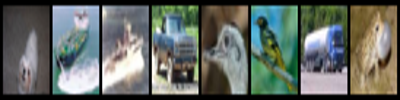

In [ ]:

dataiter = iter(train_loader)
images, labels = next(dataiter) # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(8)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

#GPU上学习
只需要先定义device参数
然后对模型以及训练数据的device参数进行设定，就可以开始了

In [ ]:
# CIFAR-10分类实战
#-------------------------------------------------------
# 导入需要模块
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

# 数据集处理
  ## 预处理的定义
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
])
# 数据集加载

# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 如果已经下载有CIFAR-10，可通过root参数指定

train_data= tv.datasets.CIFAR10(
    root='/content/sample_data',
    train = True,
    download = True,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
                    train_data,
                    batch_size=8,
                    shuffle=True,
                    num_workers=2)

# 测试集
test_data = tv.datasets.CIFAR10(
                    '/content/sample_data',
                    train=False,
                    download=True,
                    transform=transform)

test_loader = torch.utils.data.DataLoader(
                    test_data,
                    batch_size=8,
                    shuffle=False,
                    num_workers=2)

#写好类别
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#定义我们的网络
class classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(400,120)
    self.fc2 = nn.Linear(120,40)
    self.fc3 = nn.Linear(40,10)
  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(x.size()[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
# 实例化网络
cifar10 = classifier()
# 设置训练参数：学习率、动量、损失函数、优化器、epoch
lr = 0.001
momentum = 0.5
epoch = 7
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(cifar10.parameters(),lr = lr,momentum=momentum)
# gpu网络训练
# 迁移模型
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cifar10.to(device)
def train_loop(epoch):
  for epoch in range(1, epoch+1):
    cifar10.train()#网络改为训练模式
    for batch_idx, (inputs,labels) in enumerate(train_loader):
      #数据迁移
      inputs,labels = inputs.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs = cifar10(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      #更新参数
      optimizer.step()
      torch.save(cifar10.state_dict(), './model.pth')
      torch.save(optimizer.state_dict(), './optimizer.pth')
      if batch_idx % 5000 == 0:
        print("loss",loss.item())
# 开始训练
train_loop(epoch)


100%|██████████| 170498071/170498071 [00:03<00:00, 49238257.24it/s]


Extracting /content/sample_data/cifar-10-python.tar.gz to /content/sample_data
Files already downloaded and verified
loss 2.319875717163086
loss 2.3078653812408447
loss 2.195852279663086
loss 1.8789639472961426
loss 1.8410911560058594
loss 1.4138739109039307
loss 1.079664945602417
loss 2.337657928466797
loss 1.227631688117981
loss 1.338420033454895
loss 1.3624374866485596
loss 1.1579633951187134
loss 1.3516470193862915
loss 1.4614847898483276
